In [2]:
from layout import Layout, default_color_map, Tensor

## Definition
The (logical) division is defined as $A \oslash B := A \circ (B, \tilde B)$.

In terms of the pseudo code:
```python
compl = other.complement(self.size())
cat = Layout.from_concate(other, compl)
return self.composite(cat)
```

## Regular Division

A.size() = 24


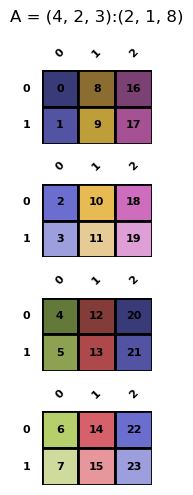

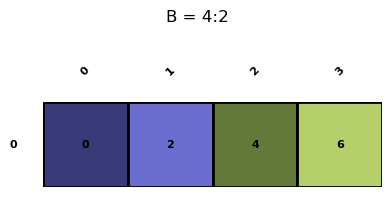

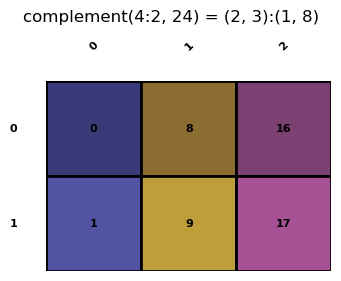

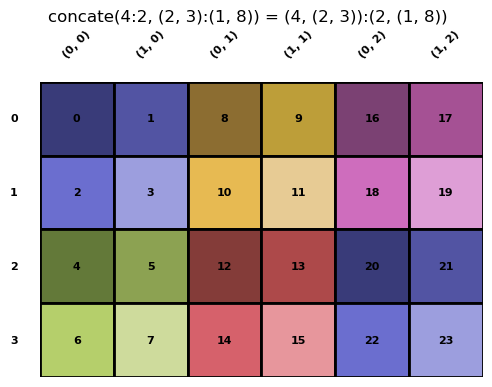

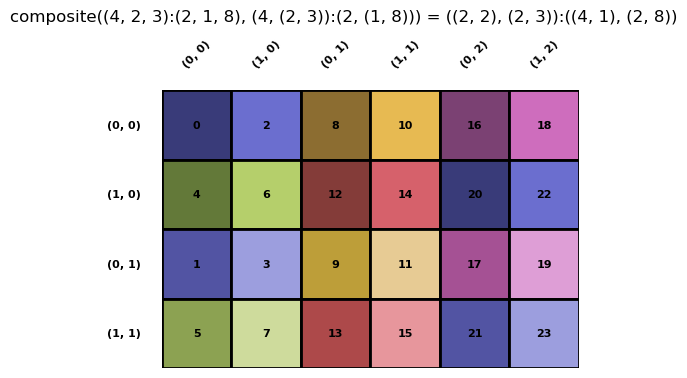

In [3]:
A = Layout.from_string('(4,2,3):(2,1,8)').visualize('A')
print('A.size() =', A.size())
B = Layout.from_string('4:2').visualize('B')
_ = A.logical_divide(B, visualize_steps=True)

If the last step is hard to grasp, we may want to linearize A:

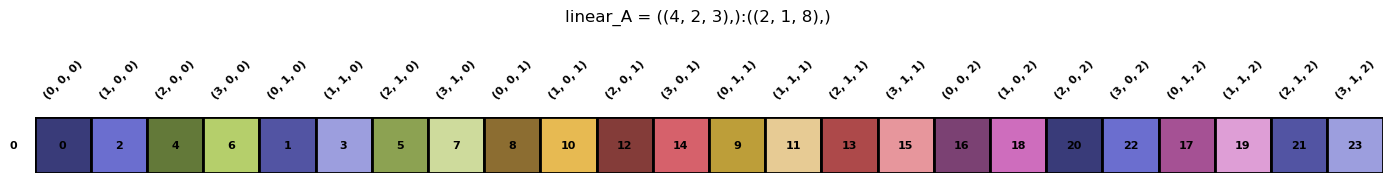

In [4]:
linear_A = Layout.from_string('( (4,2,3), ):( (2,1,8), )').visualize('linear_A')

Now it is clear to see $A \circ B$ is just de-referencing $B, \tilde{B}$ as a pointer of $A$:

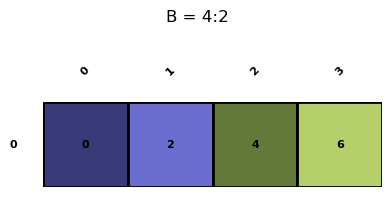

In [5]:
_ = B.visualize("B")

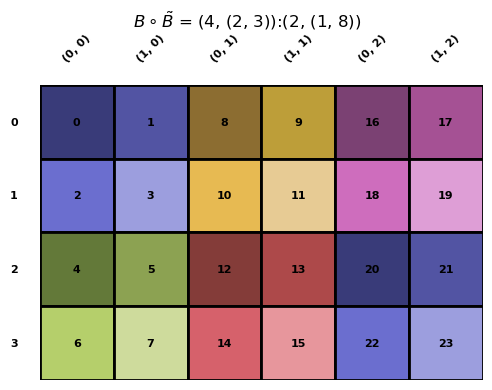

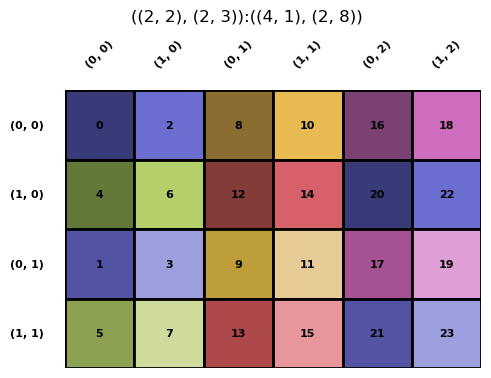

In [6]:
_ = A.composite(Layout.from_string('4,(2,3):2,(1,8)').visualize('$B \\circ \\tilde{B}$')).visualize()

## By-Mode Division

In [7]:
layout = Layout.from_string('((3, 3), ((2, 4), (2, 2))):((177, 59), ((13, 2), (26, 1)))')
table = layout.capture_idx2crd_table()

def example_color_map(index, cycle=None):
    (x0, x1), ((y00, y01), (y10, y11)) = table[index]
    mapped_index = Layout.from_string('3, (2, 2)').crd2idx((x1, (y10, y11)))
    return default_color_map(mapped_index)

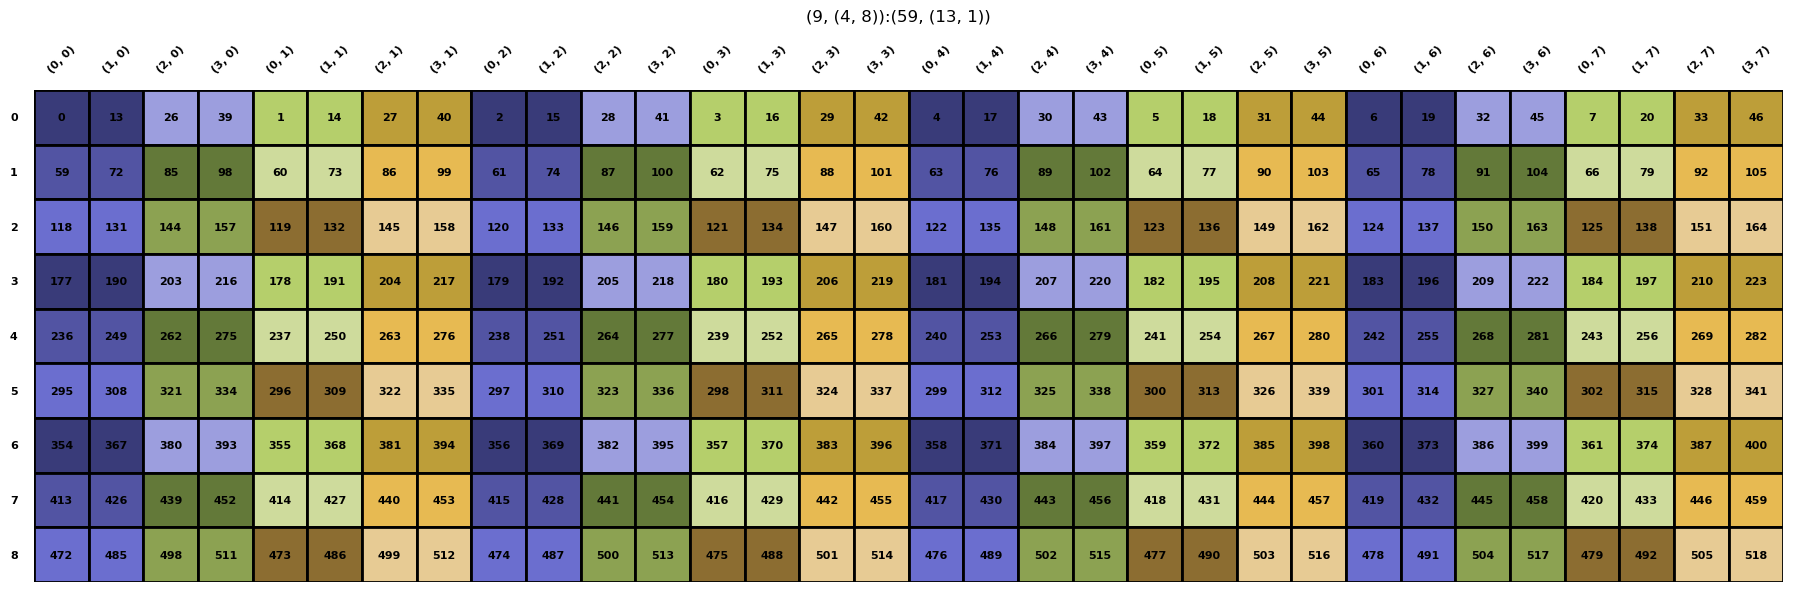

In [8]:
A = Layout.from_string('(9,(4,8)):(59,(13,1))').visualize(color_map=example_color_map)

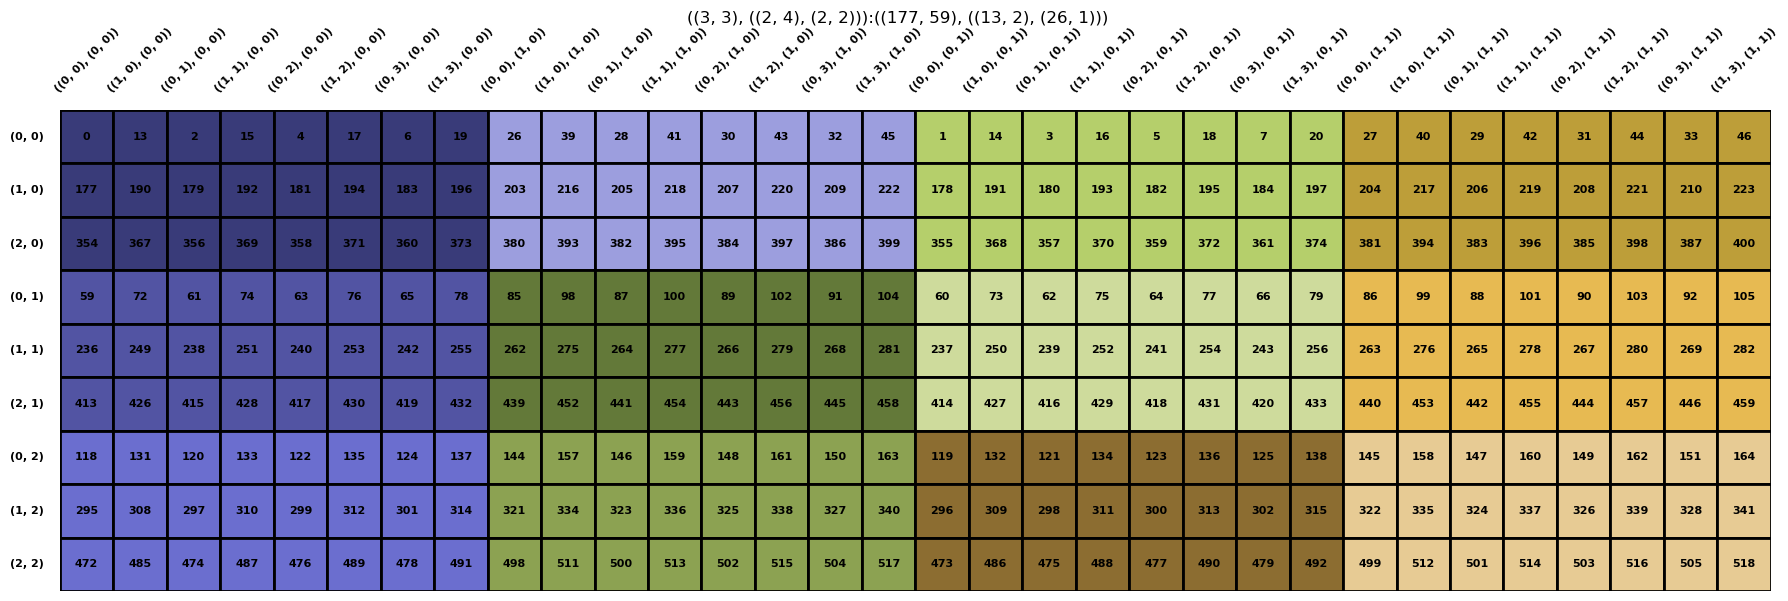

In [9]:
div = A.logical_divide(Layout.from_string('3,(2,4):3,(1,8)'), by_mode=True).visualize(color_map=example_color_map)

It is easier to break down by-mode division because everything is done within a dimension.

For example, the first row:

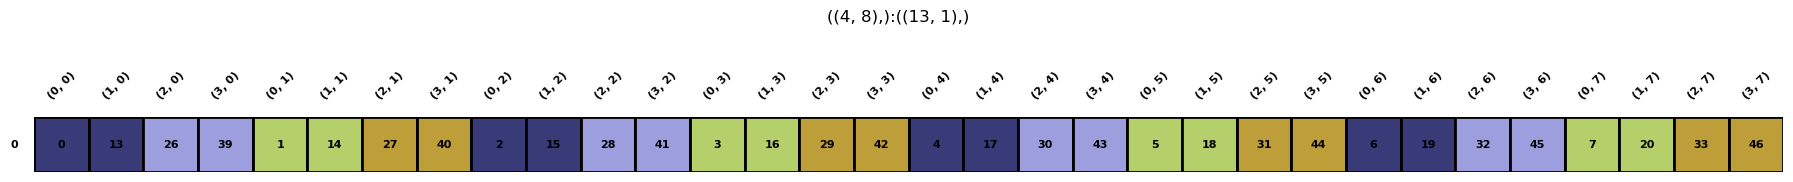

In [10]:
A_row0 = Layout.from_string('((4,8),):((13,1),)').visualize(color_map=example_color_map)

and its corresponding divisor (at the 2nd mode):

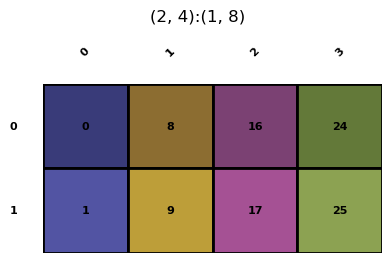

In [11]:
B_row = Layout.from_string('(2,4):(1,8)').visualize()

Dividing them will give us the tiled row:

((2, 4), (2, 2)):((13, 2), (26, 1))

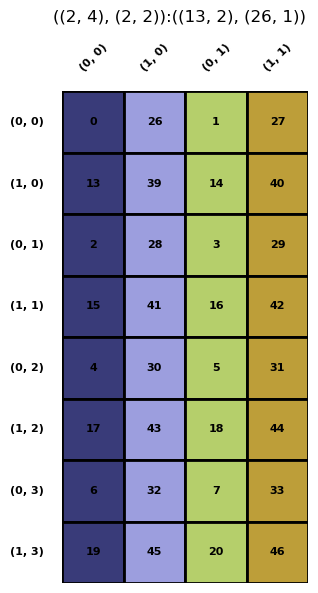

In [12]:
A_row0.logical_divide(B_row).visualize(color_map=example_color_map)

alternatively, the actual linearized version:

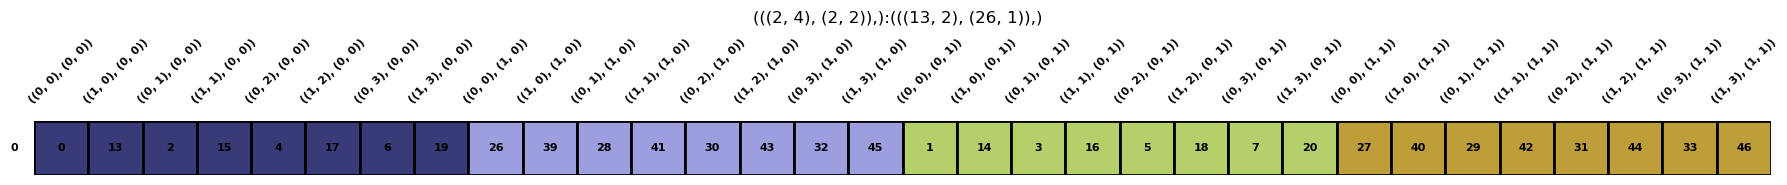

In [13]:
_ = Layout.from_string('((2, 4), (2, 2)),:((13, 2), (26, 1)),').visualize(color_map=example_color_map)

## Zipped Division

Although the visualized result is perfectly tiled:

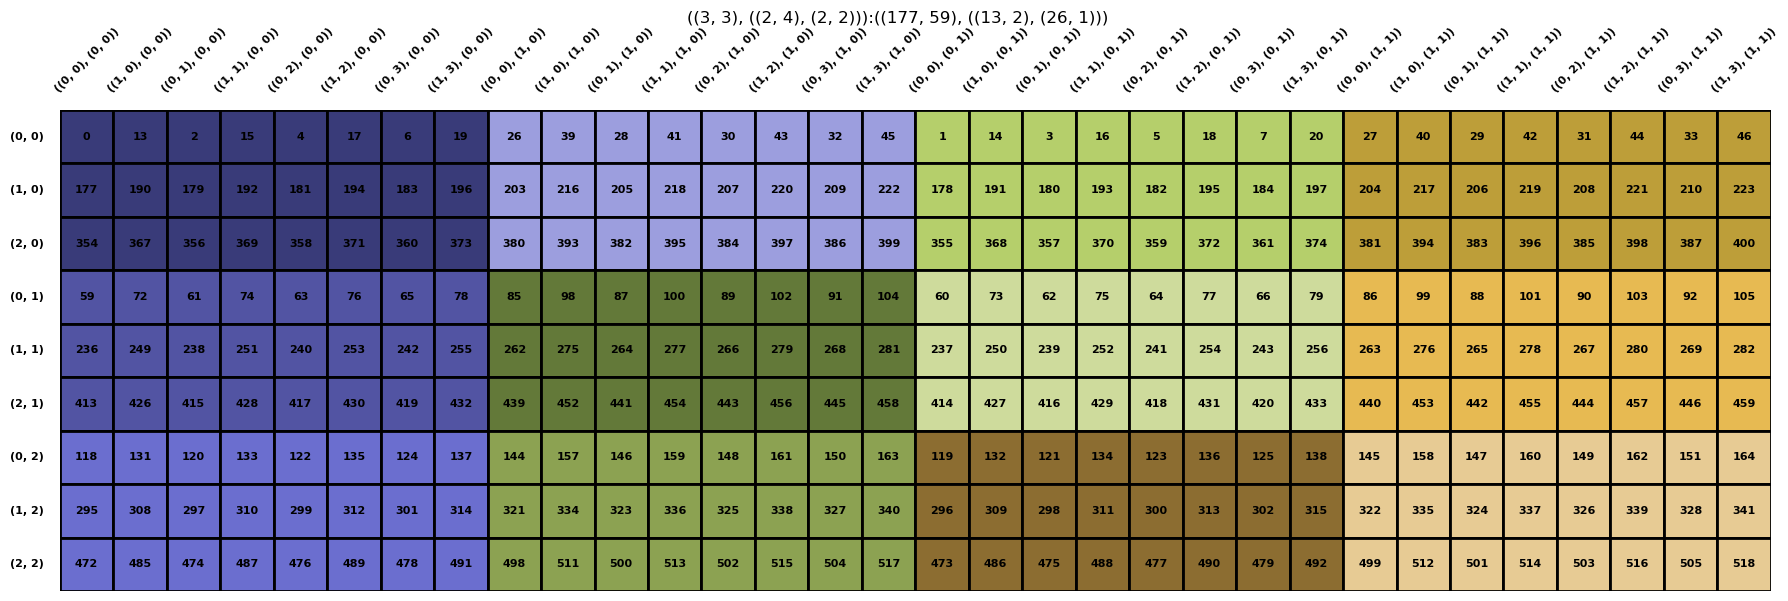

In [14]:
_ = div.visualize(color_map=example_color_map)

To access a tile via slicing:

85@((3, 1), ((2, 4), (1, 1))):((177, 0), ((13, 2), (0, 0)))

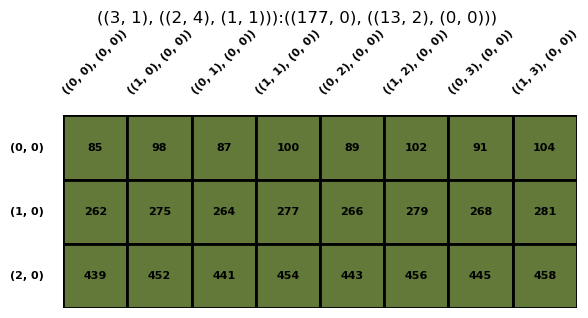

In [24]:
Tensor(div)[(None, 1), ((None, None), (1, 0))].visualize(color_map=example_color_map)

The way to access a tile is somewhat cumbersome above, instead, we can perform a "zipped divide" and lay out a easier result for a program to read a tile:

In [25]:
zipped_div = A.hierarchical_unzip('logical_divide', Layout.from_string('3,(2,4):3,(1,8)')) #.visualize(color_map=example_color_map)

((3, (2, 4)), (3, (2, 8))):((177, (13, 8)), (59, (26, 1)))

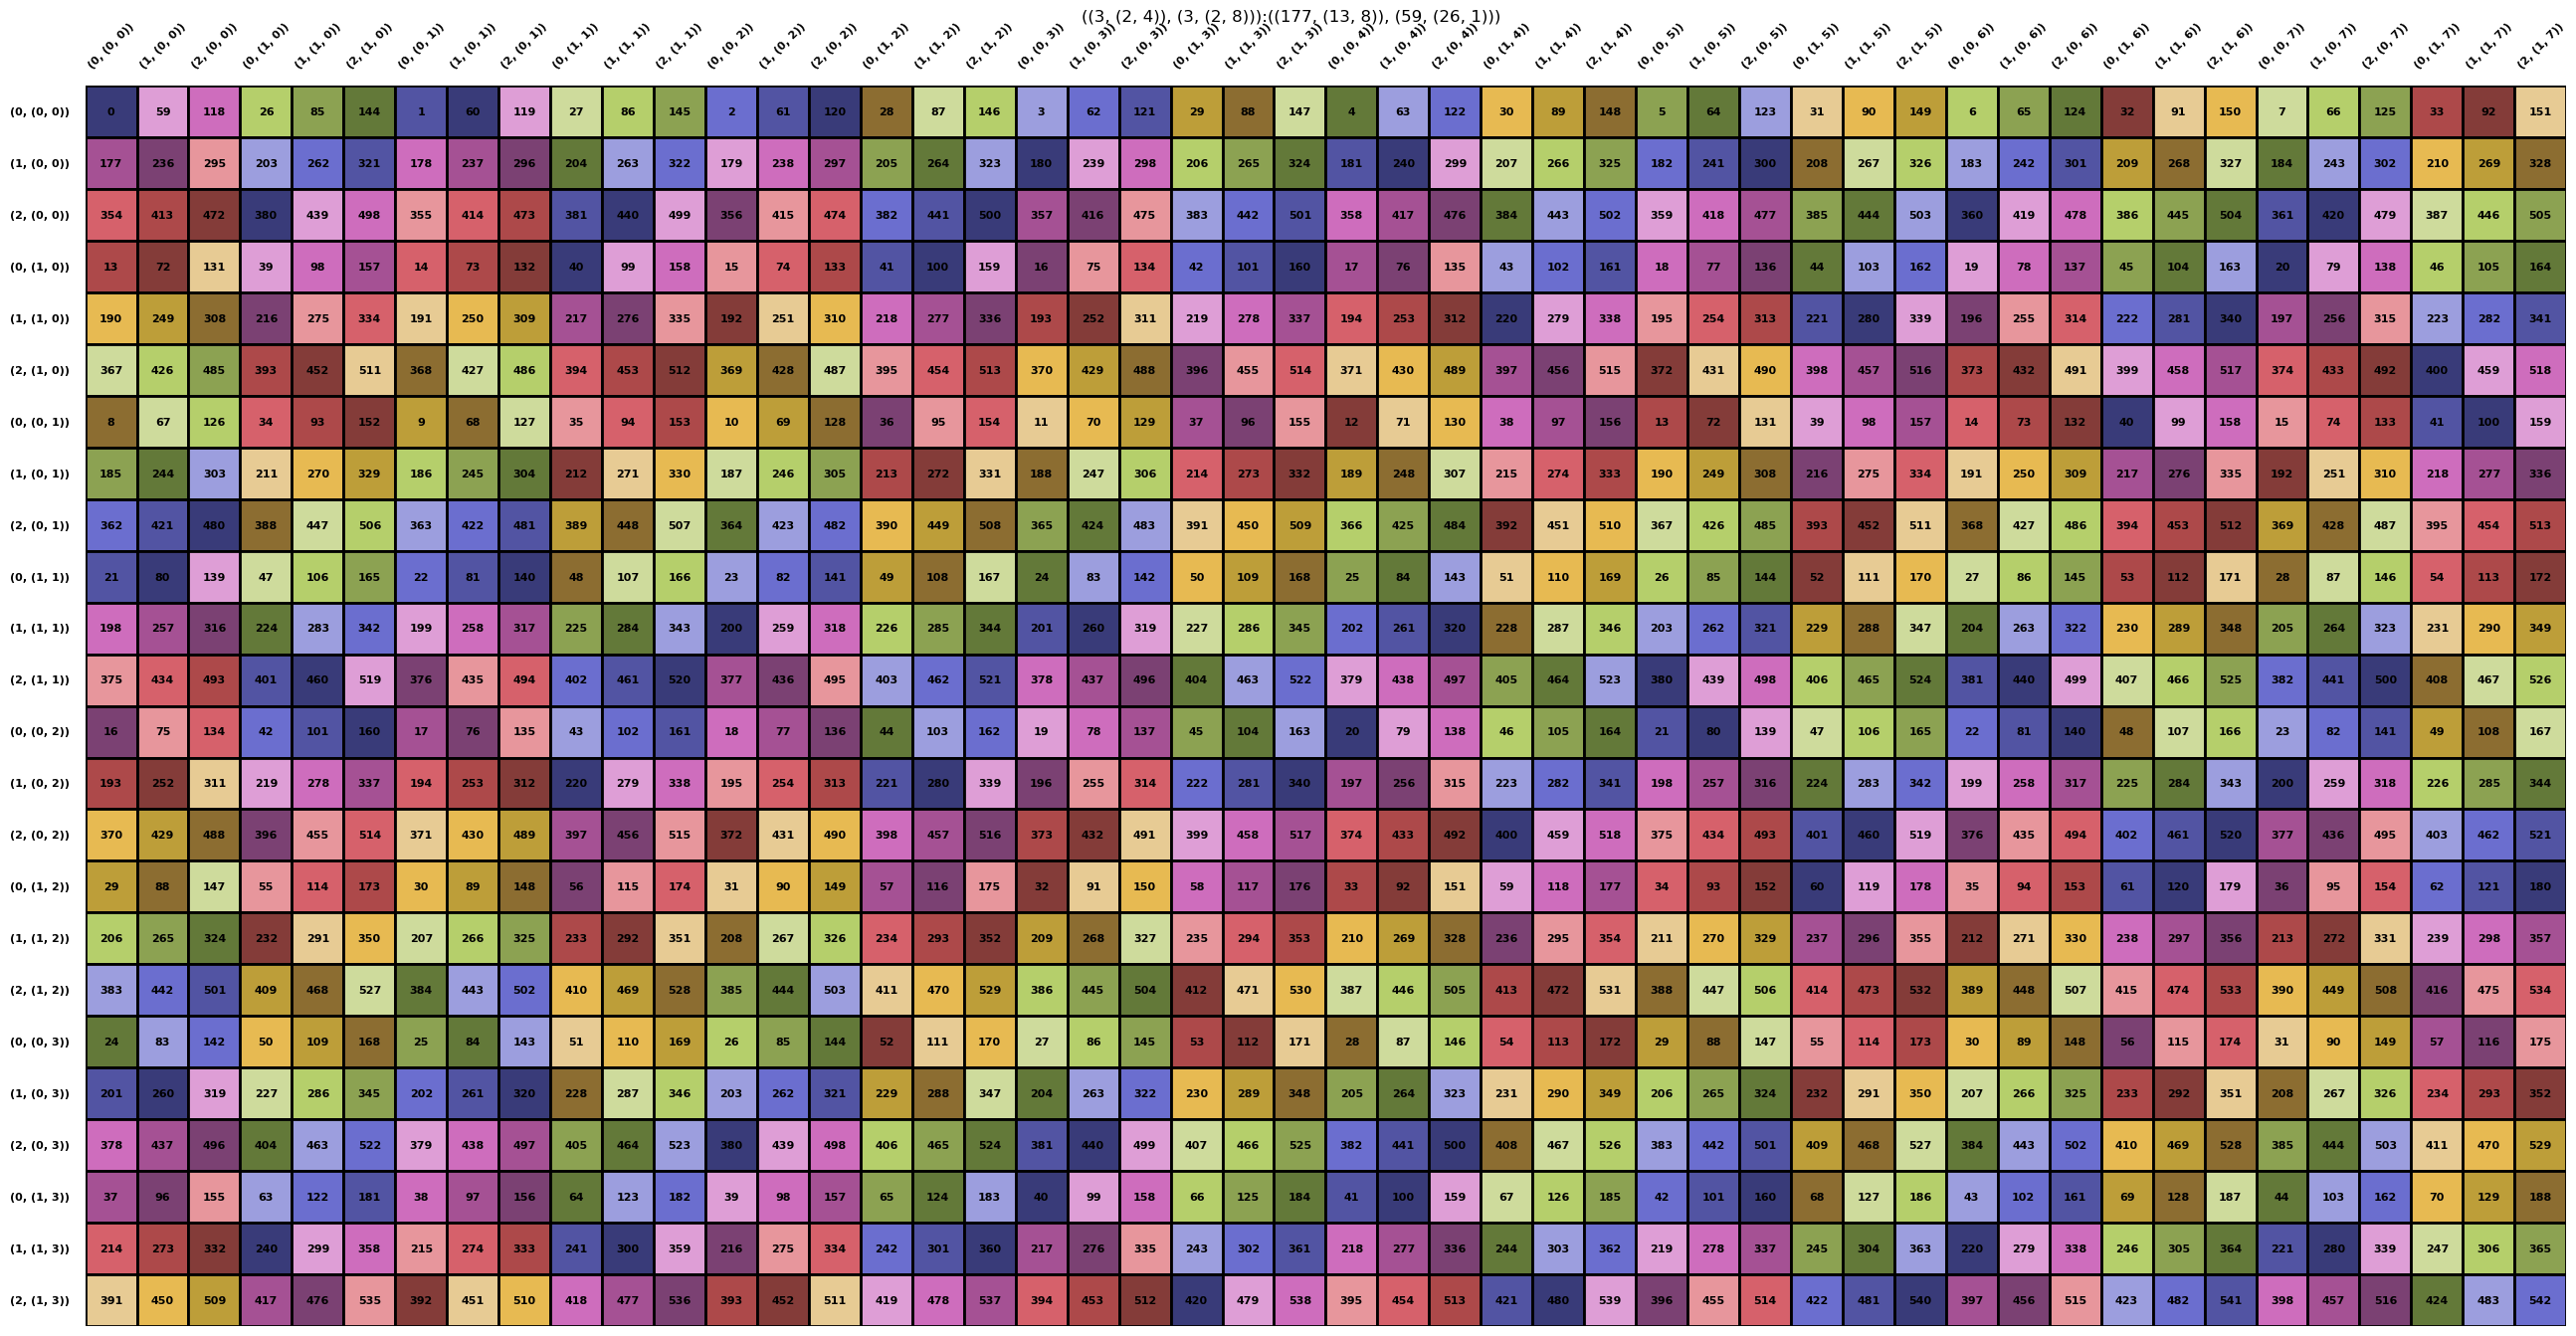

In [26]:
zipped_div.visualize()

For example, let us access the tiled view of `shape=(3,(2,4)),(3,(2,2))`.

0@((1, (2, 2)), (3, (1, 2))):((0, (13, 2)), (177, (0, 4)))

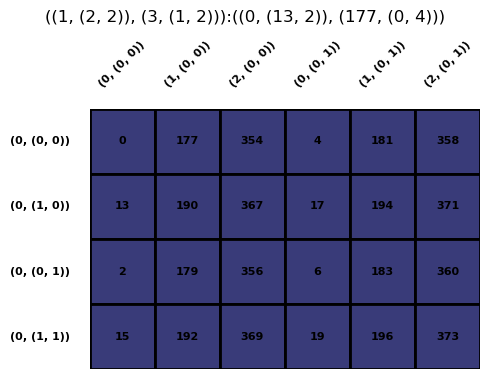

In [60]:
Tensor(zipped_div)[(0, (None, slice(0, 4, 2))), (None, (0, None))].visualize(color_map=example_color_map)